In [1]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
#import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)
piyg = cm.get_cmap('PiYG', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

import glob, root_pandas
import uproot3
from scipy.optimize import curve_fit

import misc_util

image_dir = "/home/sebouh/dihadron-analysis-note/images"

def read_n(pattern, n):
    print(n)
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        return b

Welcome to JupyROOT 6.22/06


/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [13]:
inb_data = root_pandas.read_root('../in/data_test_inbend.root', 'electrons')
outb_data = root_pandas.read_root('../in/data_test_outbend.root', 'electrons')

inb_mc = root_pandas.read_root('../in/mc_test_inb.root', 'electrons')
outb_mc = root_pandas.read_root('../in/mc_test_outb.root', 'electrons')

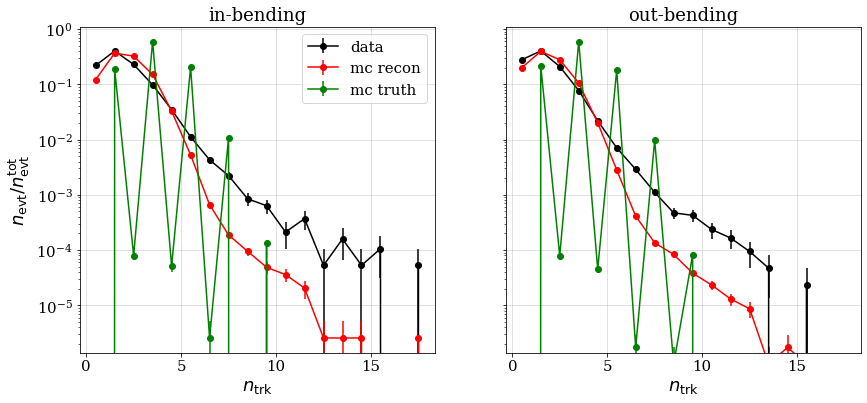

In [21]:
fig,axs = plt.subplots(1,2, figsize=(14,6),sharey='all')
axs[0].set_title('in-bending')
axs[1].set_title('out-bending')

for ax, df, lbl,col in (axs[0], inb_data, 'data','k'),(axs[0], inb_mc, 'mc recon','r'),(axs[1], outb_data, None,'k'),(axs[1], outb_mc, None,'r'):
    nbins = 18
    y,x=np.histogram(df.query("Q2>0").nhtracks, range=(0,nbins),bins=nbins)
    x = (pd.Series(x[1:])+x[:-1])/2
    y = pd.Series(y)
    
    dy = np.sqrt(y)/np.sum(y)
    y = y/np.sum(y)
    ax.errorbar(x,y,dy, color = col, marker='o',label=lbl)
    
    if 'nhtracks_truth' in df.columns:
        y,x=np.histogram(df.query("Q2>0").nhtracks_truth, range=(0,nbins),bins=nbins)
        x = (pd.Series(x[1:])+x[:-1])/2
        y = pd.Series(y)

        dy = np.sqrt(y)/np.sum(y)
        y = y/np.sum(y)
        ax.errorbar(x,y,dy, color = 'g', marker='o',label='mc truth')
    
    ax.set_yscale('log')
    ax.set_xlabel('$n_{\\mathrm{trk}}$')
    ax.grid(color='0.7',alpha=0.5)
axs[0].set_ylabel('$n_{\\mathrm{evt}}/n^{\\mathrm{tot}}_{\\mathrm{evt}}$')
axs[0].legend(loc='upper right')


plt.savefig('../images/ntracks.pdf', bbox_inches='tight')

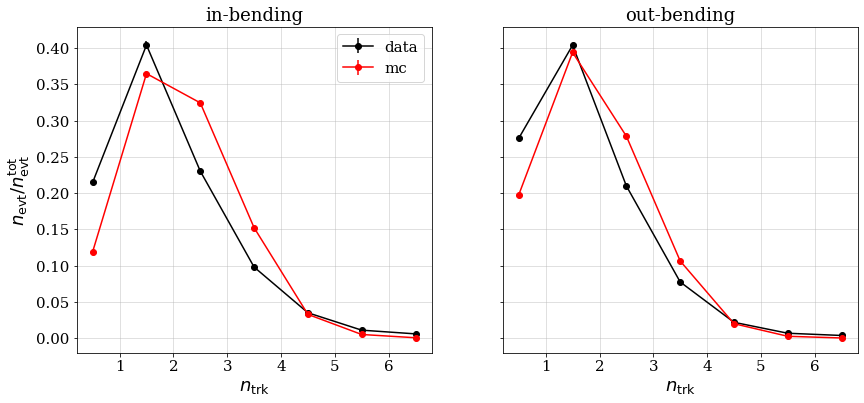

In [24]:
fig,axs = plt.subplots(1,2, figsize=(14,6),sharey='all')
axs[0].set_title('in-bending')
axs[1].set_title('out-bending')

for ax, df, lbl,col in (axs[0], inb_data, 'data','k'),(axs[0], inb_mc, 'mc','r'),(axs[1], outb_data, None,'k'),(axs[1], outb_mc, None,'r'):
    nbins = 7
    y,x=np.histogram(df.query("Q2>0 and nelectrons == 1").nhtracks, range=(0,nbins),bins=nbins)
    x = (pd.Series(x[1:])+x[:-1])/2
    y = pd.Series(y)
    
    dy = np.sqrt(y)/np.sum(y)
    y = y/np.sum(y)
    ax.errorbar(x,y,dy, color = col, marker='o',label=lbl)
    #ax.set_yscale('log')
    ax.set_xlabel('$n_{\\mathrm{trk}}$')
    ax.grid(color='0.7',alpha=0.5)
axs[0].set_ylabel('$n_{\\mathrm{evt}}/n^{\\mathrm{tot}}_{\\mathrm{evt}}$')
axs[0].legend(loc='upper right')


plt.savefig('../images/ntracks_public.pdf', bbox_inches='tight')